<a href="https://colab.research.google.com/github/2303A52359/STML/blob/main/Copy_of_STML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
path = "/content/loan_data_set.csv"
pd.read_csv(path)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


K-mediod

In [3]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

def k_medoids(data, k, max_iter=100, random_state=None):
    if random_state:
        np.random.seed(random_state)

    n_samples = data.shape[0]
    medoids = data[np.random.choice(n_samples, k, replace=False)]

    prev_medoids = np.copy(medoids)
    labels = np.zeros(n_samples)

    for _ in range(max_iter):
        distances = cdist(data, medoids)
        labels = np.argmin(distances, axis=1)

        for i in range(k):
            cluster_points = data[labels == i]
            if len(cluster_points) == 0:
                continue
            dist_matrix = cdist(cluster_points, cluster_points)
            cost_per_point = np.sum(dist_matrix, axis=1)
            new_medoid = cluster_points[np.argmin(cost_per_point)]
            medoids[i] = new_medoid

        if np.array_equal(medoids, prev_medoids):
            break

        prev_medoids = np.copy(medoids)

    return medoids, labels

def load_data():
    data = pd.DataFrame({
      'ApplicantIncome': [5000, 6000, 7000, 8000, 9000, 10000],
        'CoapplicantIncome': [0, 2000, 2500, 3000, 4000, 5000],
        'LoanAmount': [100, 150, 200, 250, 300, 350],
        'Loan_Amount_Term': [360, 360, 360, 360, 360, 360],
        'Credit_History': [1, 0, 1, 1, 0, 1],
        'Loan_Status': ['Y', 'N', 'Y', 'Y', 'N', 'Y']
    })

    data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

    X = data.drop('Loan_Status', axis=1).values
    y = data['Loan_Status'].values

    return X, y

def train_k_medoids(X_train, y_train, k=2):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    medoids, labels = k_medoids(X_train_scaled, k)

    medoid_labels = np.array([y_train[i] for i in range(len(y_train))])

    return medoids, labels, scaler, medoid_labels

def predict_k_medoids(X_test, medoids, scaler, y_train):
    X_test_scaled = scaler.transform(X_test)

    distances = cdist(X_test_scaled, medoids)

    test_labels = np.argmin(distances, axis=1)

    predictions = [y_train[label] for label in test_labels]

    return np.array(predictions)

if __name__ == '__main__':
    X, y = load_data()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    medoids, labels, scaler, medoid_labels = train_k_medoids(X_train, y_train, k=2)

    k_mediodpredictions = predict_k_medoids(X_test, medoids, scaler, medoid_labels)

    accuracy = accuracy_score(y_test, k_mediodpredictions)
    print("Accuracy:", accuracy)
    print("Predictions:", k_mediodpredictions)
    print("True labels:", y_test)


Accuracy: 0.5
Predictions: [1 1]
True labels: [1 0]


KNN

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



def load_data():

    data = pd.DataFrame({
        'ApplicantIncome': [5000, 6000, 7000, 8000, 9000, 10000],
        'CoapplicantIncome': [0, 2000, 2500, 3000, 4000, 5000],
        'LoanAmount': [100, 150, 200, 250, 300, 350],
        'Loan_Amount_Term': [360, 360, 360, 360, 360, 360],
        'Credit_History': [1, 0, 1, 1, 0, 1],  # 1 = good, 0 = bad
        'Loan_Status': ['Y', 'N', 'Y', 'Y', 'N', 'Y']
    })


    data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})


    X = data.drop('Loan_Status', axis=1).values
    y = data['Loan_Status'].values

    return X, y


def train_knn(X_train, y_train, X_test, k=3):

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)


    predictions = knn.predict(X_test_scaled)

    return predictions, knn, scaler


if __name__ == "__main__":


    X, y = load_data()


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    knn_predictions, model, scaler = train_knn(X_train, y_train, X_test, k=3)


    accuracy = accuracy_score(y_test, knn_predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")


    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, knn_predictions))


    print("\nClassification Report:")
    print(classification_report(y_test, knn_predictions))

Accuracy: 50.00%

Confusion Matrix:
[[0 1]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree

Accuracy: 100.00%

Confusion Matrix:
[[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



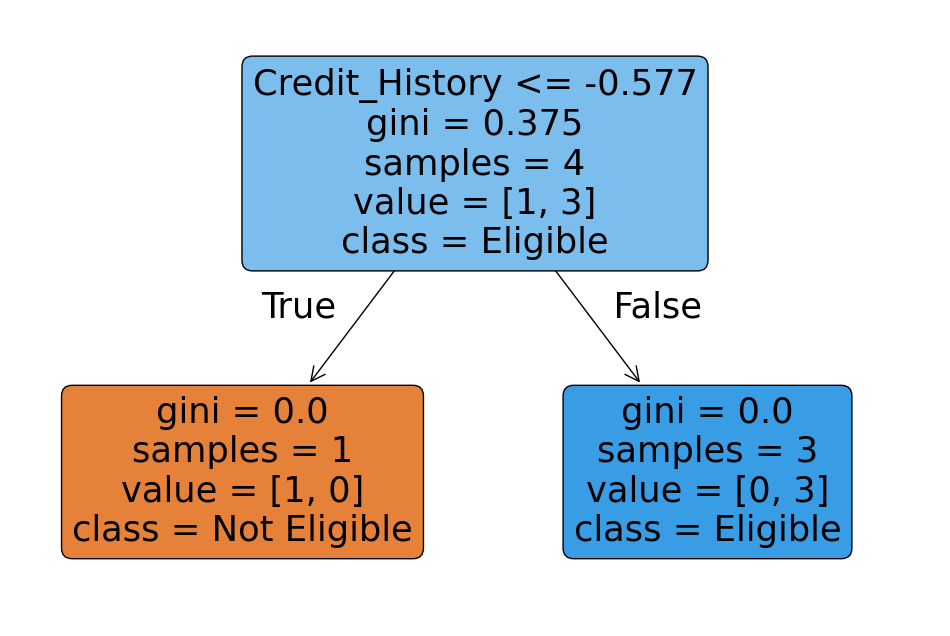

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


def load_data():

    data = pd.DataFrame({
        'ApplicantIncome': [5000, 6000, 7000, 8000, 9000, 10000],
        'CoapplicantIncome': [0, 2000, 2500, 3000, 4000, 5000],
        'LoanAmount': [100, 150, 200, 250, 300, 350],
        'Loan_Amount_Term': [360, 360, 360, 360, 360, 360],
        'Credit_History': [1, 0, 1, 1, 0, 1],  # 1 = good, 0 = bad
        'Loan_Status': ['Y', 'N', 'Y', 'Y', 'N', 'Y']  # Y = eligible, N = not eligible
    })


    data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})


    X = data.drop('Loan_Status', axis=1).values
    y = data['Loan_Status'].values

    return X, y

def train_decision_tree(X_train, y_train, X_test, max_depth=None):

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train_scaled, y_train)


    predictions = clf.predict(X_test_scaled)

    return predictions, clf, scaler


def visualize_tree(clf, feature_names):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,8))
    plot_tree(clf, feature_names=feature_names, class_names=['Not Eligible', 'Eligible'], filled=True, rounded=True)
    plt.show()

if __name__ == "__main__":


    X, y = load_data()


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    decision_predictions, model, scaler = train_decision_tree(X_train, y_train, X_test, max_depth=3)


    accuracy = accuracy_score(y_test, decision_predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")


    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, decision_predictions))


    print("\nClassification Report:")
    print(classification_report(y_test, decision_predictions))


    visualize_tree(model, feature_names=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])

Random forest

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('/content/loan_data_set.csv')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

df = pd.get_dummies(df, drop_first=True)
X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']

print(df.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

y_pred = rf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Feature Importances:')
for feature, importance in zip(X.columns, rf.feature_importances_):
    print(f'{feature}: {importance}')

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_ID_LP001003',
       'Loan_ID_LP001005', 'Loan_ID_LP001006', 'Loan_ID_LP001008',
       'Loan_ID_LP001011',
       ...
       'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object', length=628)
Accuracy: 0.7783783783783784
Confusion Matrix:
[[ 27  38]
 [  3 117]]
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.42      0.57        65
        True       0.75      0.97      0.85       120

    accuracy                           0.78       185
   macro avg       0.83      0.70      0.71       185
weighted avg       0.81      0.78      0.75       185

Feature Importances:
ApplicantIncome: 0.08307411476457945
CoapplicantIncome: 0.05583676141095644
Loa

SVM

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

df = pd.read_csv('/content/loan_data_set.csv')


X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 78.86%

Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Confusion Matrix:
[[18 25]
 [ 1 79]]


Confusion Matrix

Confusion Matrix:
[[1 0]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



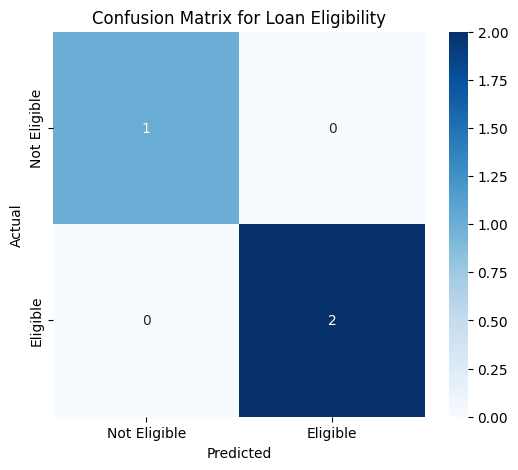

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

data = {
    'age': [25, 40, 35, 50, 45, 23, 60, 30, 37, 29],
    'income': [50000, 100000, 75000, 120000, 95000, 45000, 150000, 65000, 80000, 55000],
    'credit_score': [650, 700, 680, 720, 710, 620, 750, 690, 680, 630],
    'loan_amount': [20000, 50000, 30000, 60000, 40000, 15000, 70000, 25000, 35000, 18000],
    'loan_eligibility': [1, 1, 1, 1, 1, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)
X = df[['age', 'income', 'credit_score', 'loan_amount']]
y = df['loan_eligibility']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Loan Eligibility')
plt.show()


Accuracy

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = {
    'Age': [25, 30, 35, 40, 45, 50, 60, 27, 32, 29],
    'Income': [4000, 5000, 6000, 7000, 8000, 12000, 15000, 4500, 5000, 6000],
    'Credit_Score': [650, 700, 750, 800, 850, 900, 950, 670, 710, 730],
    'Employment_Status': [1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    'Loan_Amount': [20000, 30000, 25000, 40000, 50000, 60000, 100000, 22000, 28000, 35000],
    'Eligible': [1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

X = df[['Age', 'Income', 'Credit_Score', 'Employment_Status', 'Loan_Amount']]
y = df['Eligible']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 100.00%
Confusion Matrix:
[[3]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Precision

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

data = {
    'Age': [25, 30, 35, 40, 45, 50, 60, 27, 32, 29],
    'Income': [4000, 5000, 6000, 7000, 8000, 12000, 15000, 4500, 5000, 6000],
    'Credit_Score': [650, 700, 750, 800, 850, 900, 950, 670, 710, 730],
    'Employment_Status': [1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    'Loan_Amount': [20000, 30000, 25000, 40000, 50000, 60000, 100000, 22000, 28000, 35000],
    'Eligible': [1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

X = df[['Age', 'Income', 'Credit_Score', 'Employment_Status', 'Loan_Amount']]
y = df['Eligible']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 100.00%
Precision: 100.00%
Confusion Matrix:
[[3]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Recall

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

data = {
    'Age': [25, 30, 35, 40, 45, 50, 60, 27, 32, 29],
    'Income': [4000, 5000, 6000, 7000, 8000, 12000, 15000, 4500, 5000, 6000],
    'Credit_Score': [650, 700, 750, 800, 850, 900, 950, 670, 710, 730],
    'Employment_Status': [1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    'Loan_Amount': [20000, 30000, 25000, 40000, 50000, 60000, 100000, 22000, 28000, 35000],
    'Eligible': [1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

X = df[['Age', 'Income', 'Credit_Score', 'Employment_Status', 'Loan_Amount']]
y = df['Eligible']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 100.00%
Recall: 100.00%
Confusion Matrix:
[[3]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


F1 Score

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

data = {
    'Age': [25, 30, 35, 40, 45, 50, 60, 27, 32, 29],
    'Income': [4000, 5000, 6000, 7000, 8000, 12000, 15000, 4500, 5000, 6000],
    'Credit_Score': [650, 700, 750, 800, 850, 900, 950, 670, 710, 730],
    'Employment_Status': [1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    'Loan_Amount': [20000, 30000, 25000, 40000, 50000, 60000, 100000, 22000, 28000, 35000],
    'Eligible': [1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

X = df[['Age', 'Income', 'Credit_Score', 'Employment_Status', 'Loan_Amount']]
y = df['Eligible']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 100.00%
F1-Score: 100.00%
Confusion Matrix:
[[3]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
